In [3]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold,cross_val_score as CVS,train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

In [4]:
data = load_boston()
x = data.data
y = data.target
data

/Users/hx/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [6]:
Xtrain,Xtest,Ytrain,Ytest = TTS(x,y,test_size=0.3,random_state=420)

In [5]:
reg = XGBR(n_estimators=100).fit(Xtrain,Ytrain)
reg.predict(Xtest)

array([ 6.6689262, 22.34918  , 31.052807 , 13.911595 ,  9.467966 ,
       22.658588 , 14.514282 , 15.092699 , 15.293644 , 12.680115 ,
       24.140797 , 35.890083 , 21.573483 , 27.07066  , 19.052658 ,
        9.89033  , 23.386076 , 23.588493 , 23.311466 , 22.401644 ,
       18.98444  , 15.766946 , 25.8352   , 20.193802 , 19.982517 ,
       15.611423 , 22.883228 , 29.838228 , 22.815304 , 16.779037 ,
       37.13194  , 20.133305 , 19.67352  , 23.525528 , 22.845137 ,
       23.87397  , 15.17887  , 23.45934  , 16.685331 , 31.761686 ,
       18.525843 , 22.441063 , 38.48728  , 17.93719  , 15.10122  ,
       28.980541 , 46.363487 , 12.842797 ,  9.618281 , 35.40579  ,
       25.657566 , 20.605602 , 20.800055 , 49.228447 , 31.355848 ,
       29.382515 , 18.911947 , 21.049877 , 16.165182 , 18.098577 ,
       14.659002 , 21.720213 , 19.413454 , 28.932102 , 30.573524 ,
       19.228426 , 20.531511 , 15.666289 , 23.52929  , 19.30554  ,
       28.384985 , 42.83562  , 29.429724 , 23.306015 , 19.7412

In [6]:
reg.score(Xtest,Ytest) # 对

0.9050988968414799

In [7]:
y.mean()

22.532806324110677

In [8]:
MSE(Ytest,reg.predict(Xtest))

8.830916343629323

In [9]:
reg.feature_importances_ # 树模型的优势，可以看到模型的重要性分数,可以使用嵌入发进行特征选择。(SelectFromModel)

array([0.01902167, 0.0042109 , 0.01478316, 0.00553537, 0.02222196,
       0.37914088, 0.01679686, 0.0469872 , 0.04073574, 0.05491759,
       0.06684221, 0.00869464, 0.3201119 ], dtype=float32)

In [10]:
reg = XGBR(n_estimators=100)
CVS(reg,Xtrain,Ytrain,cv=5).mean() # 交叉验证默认返回socre的评估指标
# 严谨的交叉验证:先把数据集分为训练集合测试集。使用训练集来进行交叉验证，然后选去最好的结果在testset上来进行最后的评估
# 实际上如果使用交叉验证，测试集的选取不一定够平均，因此不一定需要验证集,建议使用全数据而不是训练集来进行交叉验证

0.7995062821902295

In [11]:
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-16.215644229762717

In [12]:
import sklearn
print(sorted(sklearn.metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']


In [13]:
rfr = RFR(n_estimators=100)# 看一下随机森林的效果
CVS(rfr,Xtrain,Ytrain,cv=5).mean()

0.8009781393218575

In [14]:
lr = LinearR()
print(CVS(lr,Xtrain,Ytrain,cv=5).mean())
CVS(lr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

0.6835070597278075


-25.349507493648503

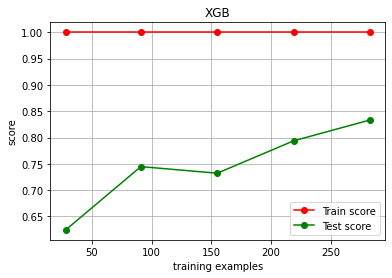

In [12]:
from plotcurve import plot_learning_curve
cv = KFold(n_splits=5,shuffle=True,random_state=42) # 交叉验证模式
plot_learning_curve(XGBR(n_estimators=200,random_state=420),"XGB",Xtrain,Ytrain,ax=None,cv=cv)
plt.show()

160 0.8320776498992342


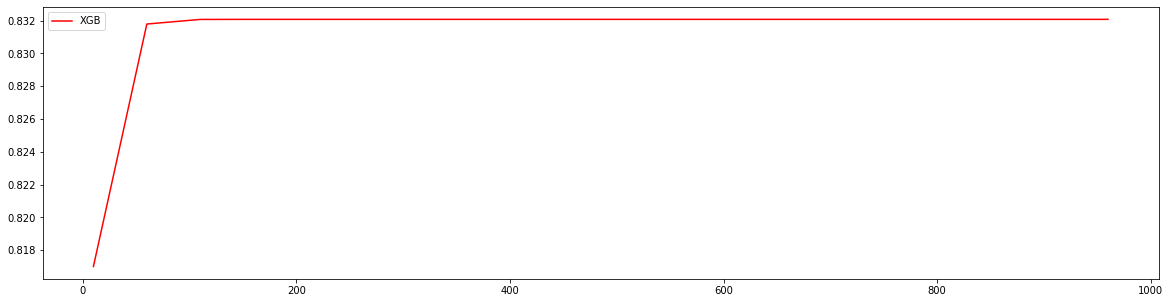

In [16]:
axisx = range(10,1010,50)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420,nthread=16)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c='red',label='XGB')
plt.legend()
plt.show()

In [20]:
axixs = range(50,1050,50)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420,nthread=16)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean()) # 记录偏差
    var.append(cvresult.var()) # 记录方差
    ge.append((1-cvresult.mean())**2+cvresult.var()) # 记录泛化误差的可控部分

160 0.8320776498992342 0.005351395694609409


ValueError: 0.0024782856939611353 is not in list

160 0.8320776498992342 0.005351395694609409
10 0.8170020274778438 0.0024782856939611353
160 0.8320776498992342 0.005351395694609409 0.03354931135797358


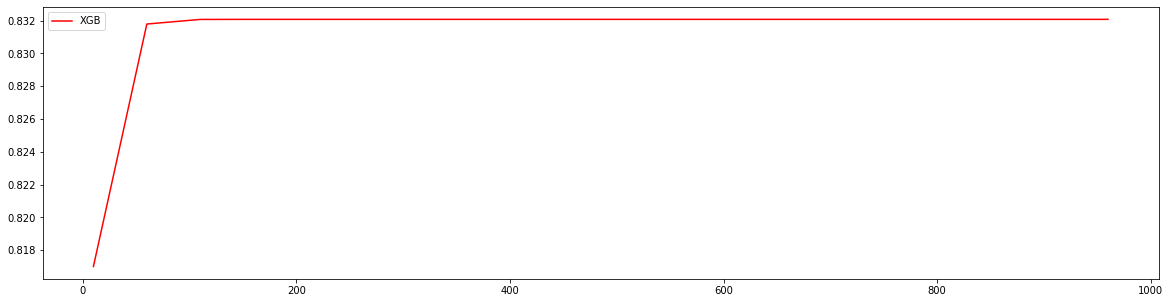

In [29]:
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])# 打印r2最高对应的参数取值
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))

plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c='red',label='XGB')
plt.legend()
plt.show()

100 0.8320924293483107 0.005344212126112929
100 0.8320924293483107 0.005344212126112929
100 0.8320924293483107 0.005344212126112929 0.03353716440826495


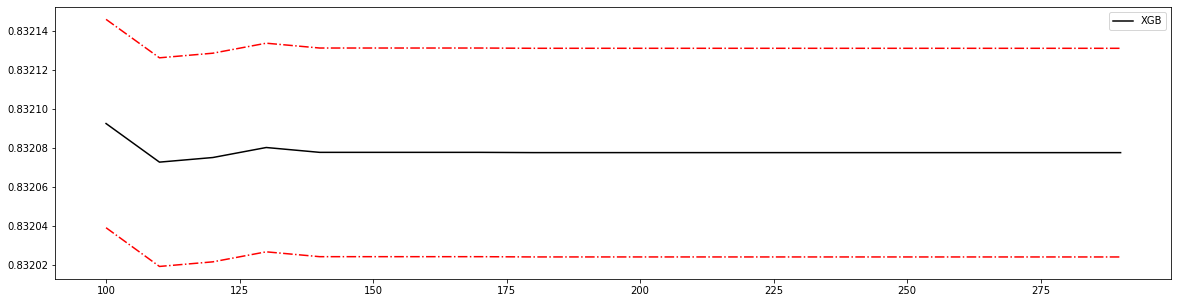

In [30]:
axisx = range(100,300,10)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420,nthread=16)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1-cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])# 打印r2最高对应的参数取值
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
# 添加方差线
rs = np.array(rs)
var = np.array(var)*0.01
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c='black',label="XGB")
#添加方差线
plt.plot(axisx,rs+var,c='red',linestyle='-.')
plt.plot(axisx,rs-var,c='red',linestyle='-.')
plt.legend()
plt.show()